In [138]:
import first
import matplotlib
import pandas
import pandas as pd
import nsfg
import numpy as np
import thinkstats2
import thinkplot


resp = nsfg.ReadFemResp()

In [41]:
timesmar = resp['timesmar'].dropna()
timesmar_standartdeviation = timesmar.std()  
timesmar_mean = timesmar.mean() 
timesmar_pdf = thinkstats2.NormalPdf(timesmar_mean, timesmar_standartdeviation)

In [42]:
timesmar_pdf = thinkstats2.NormalPdf(timesmar_mean, timesmar_standartdeviation)

In [43]:
timesmar_pdf.Density(timesmar_mean + timesmar_standartdeviation)

0.05631006752900393

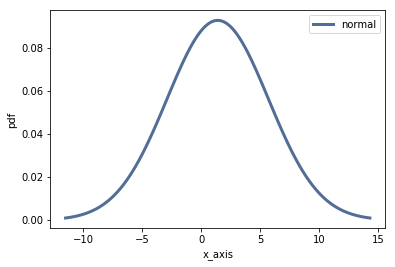

<Figure size 576x432 with 0 Axes>

In [49]:
thinkplot.Pdf(timesmar_pdf, label='normal')  
thinkplot.Show(xlabel='x_axis', ylabel='pdf')

In [45]:
jintendn = resp['jintendn'].dropna()
jintendn_standartdeviation = jintendn.std() 
jintendn_mean = jintendn.mean()

In [46]:
jintendn_pdf = thinkstats2.NormalPdf(jintendn_mean, jintendn_standartdeviation)


In [47]:
jintendn_pdf.Density(jintendn_mean + jintendn_standartdeviation)

0.024919467758428907

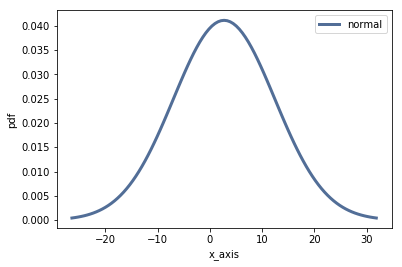

<Figure size 576x432 with 0 Axes>

In [50]:
thinkplot.Pdf(jintendn_pdf, label='normal')
thinkplot.show(xlabel='x_axis', ylabel='pdf')

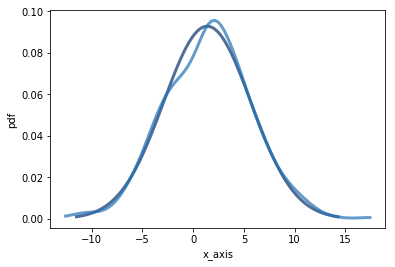

<Figure size 576x432 with 0 Axes>

In [60]:
thinkplot.Pdf(timesmar_pdf, label='normal')
keytimesmar = np.random.normal(timesmar_mean,timesmar_standartdeviation , 500) 
keytimesmar_pdf = thinkstats2.EstimatedPdf(keytimesmar, label='keytimesmar') 
thinkplot.Pdf(keytimesmar_pdf, label='keytimesmar_kde') 
thinkplot.show(xlabel='x_axis', ylabel='pdf', legend=False)

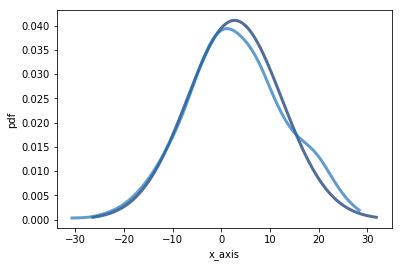

<Figure size 576x432 with 0 Axes>

In [62]:
thinkplot.Pdf(jintendn_pdf, label='normal')
keyjintendn = np.random.normal(jintendn_mean, jintendn_standartdeviation, 500)
keyjintendn_pdf = thinkstats2.EstimatedPdf(keyjintendn, label='keyjintendn')
thinkplot.Pdf(keyjintendn_pdf, label='keyjintendn_kde')
thinkplot.show(xlabel='x_axis', ylabel='pdf', legend=False)

In [69]:
def Median(xs):                                  
    cdf = thinkstats2.Cdf(xs)
    return cdf.Value(0.5)

In [70]:
def CentralMoment(xs, k):
    mean = RawMoment(xs, 1)
    sum=[(x - mean)**k for x in xs]
    return sum( (sum) / len(xs)

In [71]:
def Skewness(xs):
    return StandardizedMoment(xs, 3)

In [90]:
Skewness(timesmar)

22.219307220678285

In [91]:
Skewness(jintendn)

9.686914057933583

In [72]:
def StandardizedMoment(xs, k):
    var = CentralMoment(xs, 2)
    std = np.sqrt(var)
    return CentralMoment(xs, k) / std**k

In [73]:
def RawMoment(xs, k):
    return sum(x**k for x in xs) / len(xs)

In [74]:
def PearsonMedianSkewness(xs):
    median = Median(xs)
    mean = RawMoment(xs, 1)
    var = CentralMoment(xs, 2)
    std = np.sqrt(var)
    gp = 3 * (mean - median) / std
    return gp

In [77]:
PearsonMedianSkewness(timesmar)

0.27025442021022084

In [78]:
PearsonMedianSkewness(jintendn)

0.5270368429720083

In [88]:
def Jitter(values, jitter=0.5):
    n = len(values)
    return np.random.normal(0, jitter, n) + values

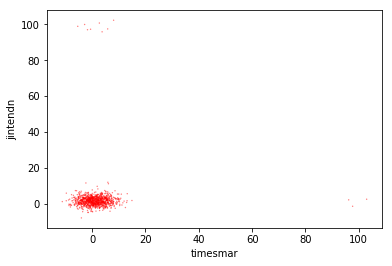

<Figure size 576x432 with 0 Axes>

In [89]:
timesmar_jitt = Jitter(timesmar.head(1000), 4)   
jintendn_jitt = Jitter(jintendn.head(1000), 2)   
thinkplot.Scatter(timesmar_jitt, jintendn_jitt, alpha=0.5, s=2,color='red')
thinkplot.show(xlabel='timesmar', ylabel='jintendn',legend=False)

In [121]:
def Sample_lines(resp, nrows, replace=False):
    basis = np.random.choice(resp.index, nrows, replace=replace)
    samples = resp.loc[basis]
    return samples
samples = SampleRows(resp, 5000)
m, p = sample.timesmar, sample.jintendn
samples.head()

[7107 1937 2349 ... 3851 5164 2440]


,caseid,rscrinf,rdormres,rostscrn,rscreenhisp,rscreenrace,age_a,age_r,cmbirth,agescrn,...,pubassis_i,basewgt,adj_mod_basewgt,finalwgt,secu_r,sest,cmintvw,cmlstyr,screentime,intvlngth
7107,6181,5,5,3,5,5.0,19,19,997,19,...,0,3409.375499,4277.959627,7524.503189,1,14,1228,1216,18:11:25,62.074000
1937,8789,1,5,5,5,5.0,21,21,973,21,...,0,1807.097167,2024.699517,2848.144811,2,82,1232,1220,15:43:03,86.944333
2349,9459,1,5,6,1,5.0,22,22,969,22,...,0,2409.855384,2594.737526,2913.890241,2,2,1236,1224,14:58:20,133.938667
6828,10894,5,5,5,5,1.0,17,17,1021,17,...,0,6819.175898,7472.864267,13144.020960,2,66,1232,1220,15:24:17,97.814000
1576,4614,5,5,1,5,4.0,33,33,832,33,...,0,1806.469915,2373.826066,3086.211268,2,54,1232,1220,17:43:11,88.145333


In [117]:
married = Jitter(mar, 2)
partners = Jitter(part, 2)
married, partners

(3665   -1.073946
 734          NaN
 2748    0.224732
 1843   -3.759072
 3490         NaN
 1452         NaN
 3617   -0.951816
 1721         NaN
 435          NaN
 3710         NaN
 6278    6.385696
 4995    3.181961
 3233         NaN
 214     1.253073
 6147    0.849791
 1136         NaN
 3033    6.775661
 1537    0.378136
 4792    4.179948
 138          NaN
 1800    2.817352
 4455         NaN
 4479    5.160212
 417    -1.014890
 7115    3.720056
 626          NaN
 6721         NaN
 2522         NaN
 4047    0.552853
 5497    0.476048
           ...   
 4707   -2.724618
 146          NaN
 7426   -0.332591
 3316    3.672987
 6868         NaN
 908          NaN
 3350         NaN
 7432   -0.328573
 6562    2.212061
 1051         NaN
 7537    3.416842
 693          NaN
 7000         NaN
 2045    1.799660
 7170    6.359870
 3394         NaN
 2948    3.162624
 4283    1.820252
 3973         NaN
 3661   -1.376320
 3118   -3.985452
 4733   -2.625730
 2700   -2.091634
 5848         NaN
 6359    3

In [120]:
cleanup = resp.dropna(subset=["timesmar", "jintendn"])
cleaned.head()

,caseid,rscrinf,rdormres,rostscrn,rscreenhisp,rscreenrace,age_a,age_r,cmbirth,agescrn,...,pubassis_i,basewgt,adj_mod_basewgt,finalwgt,secu_r,sest,cmintvw,cmlstyr,screentime,intvlngth
11,9200,5,5,3,1,5.0,26,26,923,26,...,0,2418.624283,2754.293339,2987.031126,2,18,1237,1225,14:12:31,61.060667
12,6320,5,5,5,5,1.0,23,23,952,23,...,0,5497.225851,6448.332868,7241.477811,1,18,1236,1224,14:27:20,69.906500
13,11700,1,5,4,1,5.0,34,34,822,34,...,0,3362.448309,3677.062170,4666.559600,1,18,1236,1224,11:35:31,77.493333
29,5656,5,5,3,5,5.0,26,26,921,26,...,0,4170.041867,6582.846660,7139.097203,2,18,1238,1226,11:20:54,61.501000
43,7011,1,5,3,1,5.0,34,34,815,34,...,0,3363.355288,3782.074549,4799.830810,2,83,1233,1221,13:26:28,94.169833


In [126]:
bin = np.arange(-8, 20, 2)
basis = np.digitize(cleaned.timesmar, bin)
grouped = cleaned.groupby(basis)
print(bin)

[-8 -6 -4 -2  0  2  4  6  8 10 12 14 16 18]


In [127]:
def Cov(xs, ys, meanx=None, meany=None):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)

    cov = np.dot(xs-meanx, ys-meany) / len(xs)
    return cov

In [132]:

married, partners  = cleaned["timesmar"], cleaned["jintendn"]

In [133]:
def Corr(xs, ys):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    meanx, varx = thinkstats2.MeanVar(xs)
    meany, vary = thinkstats2.MeanVar(ys)

    corr = Cov(xs, ys, meanx, meany) / np.sqrt(varx * vary)
    return corr

In [134]:
Corr(married,partners)

-0.036523466523859384

In [135]:
np.corrcoef(married, partners)


array([[ 1.        , -0.03652347],
       [-0.03652347,  1.        ]])

In [140]:
def SpearmanCorr(xs, ys):
    xranks = pd.Series(xs).rank()
    yranks = pd.Series(ys).rank()
    return Corr(xranks, yranks)

In [141]:
SpearmanCorr(married, partners)

-0.08337747790348256

In [142]:
Corr(cleaned.jintendn, np.log(cleaned.timesmar))

-0.037662435739761455